# Interior Define: Technical Portfolio

### Mackenzie Austin, Data Scientist

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Thank you for taking the time to review my technical portfolio! In this notebook, I have meticulously crafted a range of use-cases and solutions, all thoughtfully tailored to meet the specific needs of ADT. This collection proudly showcases my expertise in various domains of data analysis and machine learning, underlining my commitment to contributing to the success of your team.

##### As you explore these projects, I hope it becomes evident how my skills can empower ADT to drive innovation, enhance customer experiences, and optimize operations. I am genuinely excited about the prospect of joining your group of dedicated, creative, and passionate security professionals. Together, we can continue to shape the future of home security, and I look forward to the opportunity to be a part of this journey.

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Customer & Consumer Insights

C:\Users\maustin\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maustin\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


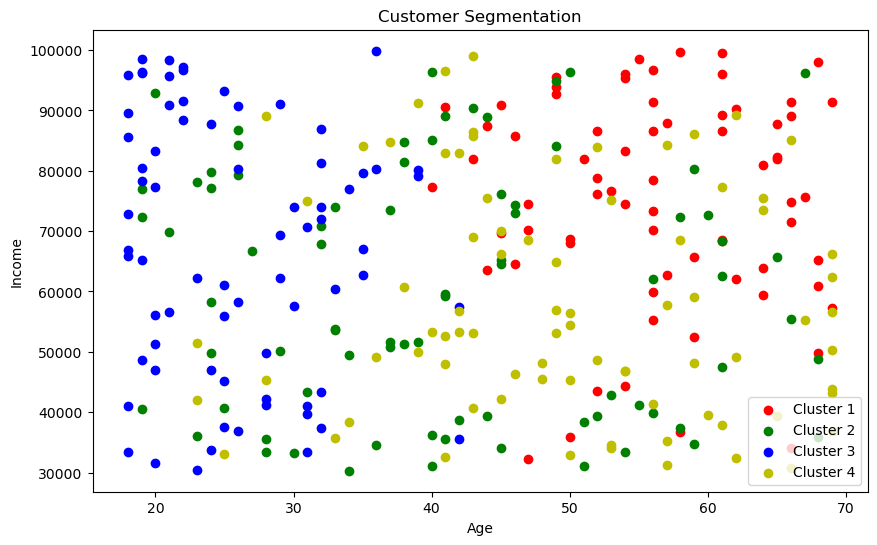

Customer Segmentation Results:

Cluster 1:
  - Mean Age: 56.41 (±7.81 years)
  - Mean Income: $75,313.57 (±$17,240.16)
  - Purchase Frequency: 0.77 (±0.17 times/year)
  - Satisfaction: 3.77 (±0.69)

Cluster 2:
  - Mean Age: 41.06 (±13.60 years)
  - Mean Income: $60,043.00 (±$20,202.83)
  - Purchase Frequency: 1.32 (±0.13 times/year)
  - Satisfaction: 4.15 (±0.56)

Cluster 3:
  - Mean Age: 25.96 (±6.57 years)
  - Mean Income: $67,278.49 (±$21,172.69)
  - Purchase Frequency: 0.81 (±0.20 times/year)
  - Satisfaction: 3.59 (±0.80)

Cluster 4:
  - Mean Age: 49.69 (±12.01 years)
  - Mean Income: $58,224.74 (±$18,732.81)
  - Purchase Frequency: 1.05 (±0.24 times/year)
  - Satisfaction: 2.51 (±0.36)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Generate random customer data
np.random.seed(42)
n_samples = 300
data = {
    'Age': np.random.randint(18, 70, n_samples),
    'Income': np.random.randint(30000, 100000, n_samples),
    'PurchaseFrequency': np.random.uniform(0.5, 1.5, n_samples),
    'Satisfaction': np.random.uniform(2, 5, n_samples)
}
df = pd.DataFrame(data)

# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Customer segmentation using K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Create a clear visualization
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y']
for cluster in range(4):
    plt.scatter(
        df[df['Cluster'] == cluster]['Age'],
        df[df['Cluster'] == cluster]['Income'],
        label=f'Cluster {cluster + 1}',
        c=colors[cluster]
    )

plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

# Analyze customer segments
segment_info = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Income': ['mean', 'std'],
    'PurchaseFrequency': ['mean', 'std'],
    'Satisfaction': ['mean', 'std']
})

# Print a simple summary of the results
print("Customer Segmentation Results:")
for cluster in range(4):
    print(f"\nCluster {cluster + 1}:")
    print(f"  - Mean Age: {segment_info['Age']['mean'][cluster]:.2f} (±{segment_info['Age']['std'][cluster]:.2f} years)")
    print(f"  - Mean Income: ${segment_info['Income']['mean'][cluster]:,.2f} (±${segment_info['Income']['std'][cluster]:,.2f})")
    print(f"  - Purchase Frequency: {segment_info['PurchaseFrequency']['mean'][cluster]:.2f} (±{segment_info['PurchaseFrequency']['std'][cluster]:.2f} times/year)")
    print(f"  - Satisfaction: {segment_info['Satisfaction']['mean'][cluster]:.2f} (±{segment_info['Satisfaction']['std'][cluster]:.2f})")

### Inventory Management

In [2]:
import random
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate random initial inventory data
random.seed(42)
n_products = 10
products = [f"Product_{i}" for i in range(1, n_products + 1)]
initial_inventory = [random.randint(10, 100) for _ in range(n_products)]

# Generate random demand data
demand_means = [random.uniform(5, 20) for _ in range(n_products)]
demand_stddevs = [random.uniform(2, 5) for _ in range(n_products)]
demand_data = [np.random.normal(mean, stddev, 30) for mean, stddev in zip(demand_means, demand_stddevs)]

# Create an inventory DataFrame
inventory_df = pd.DataFrame({'Product': products, 'Initial_Inventory': initial_inventory})

# Simulate inventory management using linear regression
def simulate_inventory_management(df, demand_data):
    for idx, row in df.iterrows():
        product_name = row['Product']
        demand = demand_data[idx]

        X = np.arange(1, 31).reshape(-1, 1)
        y = demand

        model = LinearRegression()
        model.fit(X, y)
        future_demand = model.predict([[31]])[0]

        if future_demand > 0:
            order_quantity = max(0, future_demand - row['Initial_Inventory'])
            df.at[idx, 'Order_Quantity'] = order_quantity
            df.at[idx, 'Final_Inventory'] = row['Initial_Inventory'] + order_quantity
        else:
            df.at[idx, 'Order_Quantity'] = 0
            df.at[idx, 'Final_Inventory'] = row['Initial_Inventory']
    return df

# Simulate inventory management for a month
inventory_df = simulate_inventory_management(inventory_df, demand_data)

# Display the inventory status
print("Inventory Status After Simulated Management:")
print(inventory_df)

# Explanation of the output
print("\nExplanation of Output:")
print("For each product, the script simulates inventory management for a month.")
print("It predicts future demand using linear regression based on past 30 days of demand data.")
print("If the predicted demand exceeds the current inventory, an order is placed to replenish the stock.")
print("The 'Order_Quantity' column shows the quantity ordered, and 'Final_Inventory' shows the updated inventory after replenishment.")

Inventory Status After Simulated Management:
      Product  Initial_Inventory  Order_Quantity  Final_Inventory
0   Product_1                 91             0.0             91.0
1   Product_2                 24             0.0             24.0
2   Product_3                 13             0.0             13.0
3   Product_4                 45             0.0             45.0
4   Product_5                 41             0.0             41.0
5   Product_6                 38             0.0             38.0
6   Product_7                 27             0.0             27.0
7   Product_8                 23             0.0             23.0
8   Product_9                 96             0.0             96.0
9  Product_10                 79             0.0             79.0

Explanation of Output:
For each product, the script simulates inventory management for a month.
It predicts future demand using linear regression based on past 30 days of demand data.
If the predicted demand exceeds the current 

### Personalization & Targeted Marketing

In [3]:
import random
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Generate random customer data
random.seed(42)
n_customers = 100
customer_ids = range(1, n_customers + 1)
customer_data = {
    'Customer_ID': customer_ids,
    'Age': [random.randint(18, 65) for _ in range(n_customers)],
    'Gender': [random.choice(['Male', 'Female']) for _ in range(n_customers)],
}

# Generate random product data
n_products = 20
product_ids = range(1, n_products + 1)
product_data = {
    'Product_ID': product_ids,
    'Category': [random.choice(['Sofa', 'Chair', 'Table', 'Bed', 'Cabinet']) for _ in range(n_products)],
}

# Create customer-product interaction data
customer_product_data = {
    'Customer_ID': [random.choice(customer_ids) for _ in range(500)],
    'Product_ID': [random.choice(product_ids) for _ in range(500)],
}

# Create DataFrames
customers_df = pd.DataFrame(customer_data)
products_df = pd.DataFrame(product_data)
interactions_df = pd.DataFrame(customer_product_data)

# Encode product categories
label_encoder = LabelEncoder()
products_df['Category_Encoded'] = label_encoder.fit_transform(products_df['Category'])

# Create a customer-product matrix
customer_product_matrix = pd.crosstab(interactions_df['Customer_ID'], interactions_df['Product_ID'])

# Calculate the cosine similarity
similarities = cosine_similarity(customer_product_matrix)
similarity_df = pd.DataFrame(similarities, index=customer_product_matrix.index, columns=customer_product_matrix.index)

# Recommend products for a random customer
random_customer_id = random.choice(customer_ids)
recommendations = similarity_df[random_customer_id].sort_values(ascending=False)[1:4]

# Display the recommendations
print(f"Recommended products for Customer {random_customer_id}:")
for customer_id, score in recommendations.items():
    product_id = interactions_df[interactions_df['Customer_ID'] == customer_id]['Product_ID'].values[0]
    product_name = products_df[products_df['Product_ID'] == product_id]['Category'].values[0]
    print(f"Product ID: {product_id}, Category: {product_name}, Similarity Score: {score:.2f}")
    
# Examine the output
print("\nExplanation of Output:")
print("1. Customer Data: Random customer data is generated, including customer IDs, age, and gender.")
print("2. Product Data: Random product data is generated, including product IDs and categories.")
print("3. Customer-Product Interactions: Simulated customer interactions with random products are created.")

print("\nRecommendations for a Random Customer:")
print("   - For a random customer (Customer ID is displayed), the script recommends 3 products.")
print("   - These recommendations are based on cosine similarity between the customer's interaction history and other customers.")
print("   - The 'Similarity Score' indicates how closely the customer's preferences align with the recommended product.")

print("\nNote:")
print("This script provides simplified product recommendations and is for demonstration purposes. In a real-world scenario, recommendation systems use more extensive data and advanced algorithms to provide more accurate and personalized suggestions.")

Recommended products for Customer 100:
Product ID: 17, Category: Bed, Similarity Score: 0.87
Product ID: 14, Category: Bed, Similarity Score: 0.71
Product ID: 4, Category: Chair, Similarity Score: 0.65

Explanation of Output:
1. Customer Data: Random customer data is generated, including customer IDs, age, and gender.
2. Product Data: Random product data is generated, including product IDs and categories.
3. Customer-Product Interactions: Simulated customer interactions with random products are created.

Recommendations for a Random Customer:
   - For a random customer (Customer ID is displayed), the script recommends 3 products.
   - These recommendations are based on cosine similarity between the customer's interaction history and other customers.
   - The 'Similarity Score' indicates how closely the customer's preferences align with the recommended product.

Note:
This script provides simplified product recommendations and is for demonstration purposes. In a real-world scenario, rec

### Pricing Strategy

In [4]:
import random
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Generate random product cost and demand data
random.seed(42)
n_products = 10
product_ids = range(1, n_products + 1)
product_data = {
    'Product_ID': product_ids,
    'Cost_Price': [random.uniform(50, 200) for _ in range(n_products)],
}

def generate_demand(price):
    # Simulate demand as a decreasing linear function of price
    return 200 - 2 * price

# Create a DataFrame for product data
products_df = pd.DataFrame(product_data)

# Simulate pricing optimization for each product
def optimize_pricing(product):
    initial_price = random.uniform(150, 300)

    # Define an optimization function to maximize profit
    def profit(price):
        demand = generate_demand(price)
        return -1 * (price - product['Cost_Price']) * demand

    result = minimize(profit, initial_price, bounds=[(50, 300)])

    return result.x[0], -result.fun

# Simulate pricing optimization for all products
optimized_prices = []
max_profits = []

for index, product in products_df.iterrows():
    optimized_price, max_profit = optimize_pricing(product)
    optimized_prices.append(optimized_price)
    max_profits.append(max_profit)

# Update the DataFrame with optimized prices and max profits
products_df['Optimized_Price'] = optimized_prices
products_df['Max_Profit'] = max_profits

# Display the optimized prices and max profits
print("Optimized Prices and Max Profits for Products:")
print(products_df[['Product_ID', 'Cost_Price', 'Optimized_Price', 'Max_Profit']])

# Examine the output
print("\n Explanation of Output:")
print("1. Product Data: Random product data is generated, including product IDs and cost prices.")
print("2. Demand Simulation: Demand for each product is simulated as a decreasing linear function of price.")

print("\nPricing Optimization:")
print("   - For each product, the script performs pricing optimization to find an optimal price.")
print("   - The optimization aims to maximize profit by adjusting the product's price.")
print("   - The 'Optimized_Price' column displays the optimal price, and the 'Max_Profit' column shows the maximum profit achievable at that price.")

print("\nNote:")
print("This script provides a simplified example of pricing optimization based on linear demand functions.")
print("In real-world scenarios, pricing decisions involve more complex models and multiple factors, including competition, market dynamics, and customer behavior.")

Optimized Prices and Max Profits for Products:
   Product_ID  Cost_Price  Optimized_Price   Max_Profit
0           1  145.914020       122.957008  1054.048606
1           2   53.751613        76.875807  1069.456637
2           3   91.254398        95.627199    38.242779
3           4   83.481611        91.740805   136.428592
4           5  160.470682       130.235342  1828.351698
5           6  151.504923       125.752465  1326.378552
6           7  183.826935       141.913465  3513.477529
7           8   63.040825        81.520415   682.990312
8           9  113.288273       106.644137    88.289099
9          10   54.469583        77.234793  1036.509440

 Explanation of Output:
1. Product Data: Random product data is generated, including product IDs and cost prices.
2. Demand Simulation: Demand for each product is simulated as a decreasing linear function of price.

Pricing Optimization:
   - For each product, the script performs pricing optimization to find an optimal price.
   - The

### Quality Control

Out-of-control points:
      Quality
32  87.140164


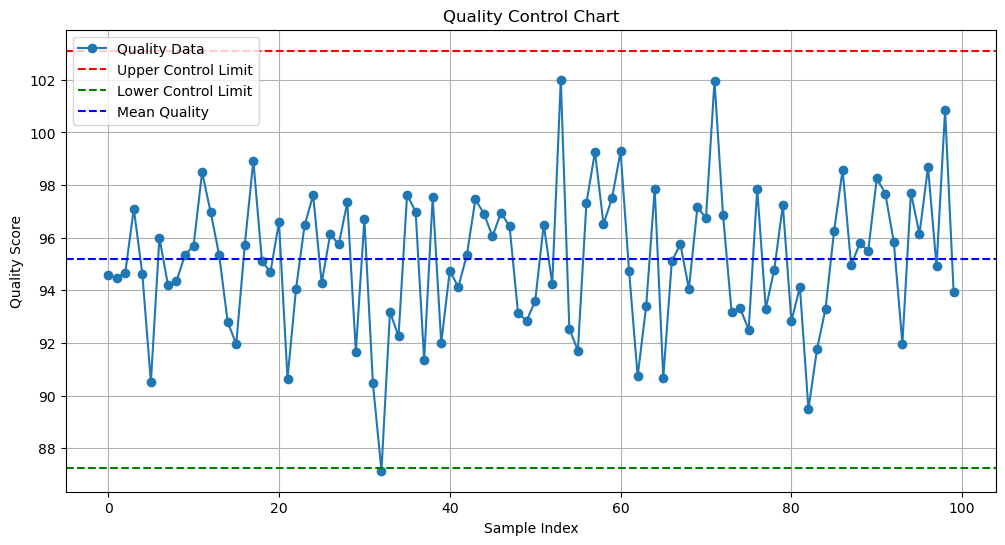

Explanation of Output:
1. Quality Data: Random quality data is generated for a manufacturing process.
2. Control Limits: Control limits are established based on the mean and standard deviation of the quality data.
   - The upper control limit is set at Mean + 3 times Standard Deviation.
   - The lower control limit is set at Mean - 3 times Standard Deviation.

Quality Control Chart:
   - The control chart displays the quality data as a function of sample index.
   - The blue dashed line represents the Mean Quality.
   - The red dashed line represents the Upper Control Limit.
   - The green dashed line represents the Lower Control Limit.

Identification of Out-of-Control Points:
   - Any data points falling above the Upper Control Limit or below the Lower Control Limit are considered out of control.
   - Out-of-control points are displayed, if any.

Note:
This script provides a basic example of quality control using control charts.
In real-world scenarios, quality control involves more 

In [5]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate random quality data for a manufacturing process
random.seed(42)
n_samples = 100
mean_quality = 95  # Mean quality score
std_deviation = 3  # Standard deviation

quality_data = [random.gauss(mean_quality, std_deviation) for _ in range(n_samples)]

# Create a DataFrame for quality data
quality_df = pd.DataFrame({'Quality': quality_data})

# Calculate control limits based on the mean and standard deviation
mean = quality_df['Quality'].mean()
std = quality_df['Quality'].std()

# Set control limits (e.g., ±3 standard deviations)
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

# Perform advanced quality control analysis using control charts
plt.figure(figsize=(12, 6))
plt.plot(quality_df.index, quality_df['Quality'], marker='o', label='Quality Data')
plt.axhline(upper_limit, color='r', linestyle='--', label='Upper Control Limit')
plt.axhline(lower_limit, color='g', linestyle='--', label='Lower Control Limit')
plt.axhline(mean, color='b', linestyle='--', label='Mean Quality')

plt.title('Quality Control Chart')
plt.xlabel('Sample Index')
plt.ylabel('Quality Score')
plt.legend()
plt.grid(True)

# Identify out-of-control points
out_of_control_points = quality_df[(quality_df['Quality'] > upper_limit) | (quality_df['Quality'] < lower_limit)]

# Display out-of-control points
if not out_of_control_points.empty:
    print("Out-of-control points:")
    print(out_of_control_points)

# Show the control chart
plt.show()

# Explanation of the Quality Control Output:
print("Explanation of Output:")
print("1. Quality Data: Random quality data is generated for a manufacturing process.")
print("2. Control Limits: Control limits are established based on the mean and standard deviation of the quality data.")
print("   - The upper control limit is set at Mean + 3 times Standard Deviation.")
print("   - The lower control limit is set at Mean - 3 times Standard Deviation.")

print("\nQuality Control Chart:")
print("   - The control chart displays the quality data as a function of sample index.")
print("   - The blue dashed line represents the Mean Quality.")
print("   - The red dashed line represents the Upper Control Limit.")
print("   - The green dashed line represents the Lower Control Limit.")

print("\nIdentification of Out-of-Control Points:")
print("   - Any data points falling above the Upper Control Limit or below the Lower Control Limit are considered out of control.")
print("   - Out-of-control points are displayed, if any.")

print("\nNote:")
print("This script provides a basic example of quality control using control charts.")
print("In real-world scenarios, quality control involves more complex statistical methods and domain-specific knowledge.")

### Operational Efficiency

Explanation of Output:
1. Operational Data: Random operational data is generated, including daily production, downtime, and labor costs.
2. Operational Efficiency: Efficiency is calculated as (Daily Production) / (Daily Production + Daily Downtime).
3. Cost Per Widget: Cost per widget is calculated as (Daily Labor Costs) / (Daily Production).
4. Operational Efficiency Over Time: The chart visualizes how operational efficiency changes over the 30-day period.

Summary Statistics:
   - Mean Operational Efficiency: 97.21%
   - Standard Deviation of Operational Efficiency: 1.81%
   - Mean Cost Per Widget: $2.79


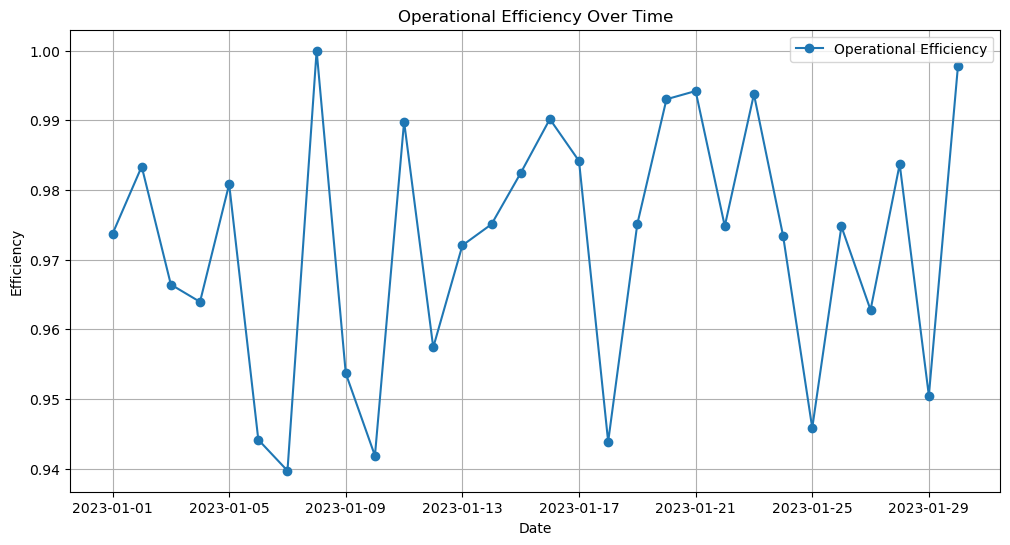

In [6]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for operational efficiency
random.seed(42)
n_days = 30

# Simulate daily production output (widgets produced)
daily_production = [random.randint(800, 1000) for _ in range(n_days)]

# Simulate daily downtime (in minutes)
daily_downtime = [random.randint(0, 60) for _ in range(n_days)]

# Simulate daily labor costs (in dollars)
daily_labor_costs = [random.uniform(2000, 3000) for _ in range(n_days)]

# Create a DataFrame for operational data
operational_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=n_days),
    'Daily_Production': daily_production,
    'Daily_Downtime_Minutes': daily_downtime,
    'Daily_Labor_Costs': daily_labor_costs
})

# Calculate operational efficiency metrics
operational_data['Efficiency'] = operational_data['Daily_Production'] / (operational_data['Daily_Production'] + operational_data['Daily_Downtime_Minutes'])
operational_data['Cost_Per_Widget'] = operational_data['Daily_Labor_Costs'] / operational_data['Daily_Production']

# Visualize operational efficiency over time
plt.figure(figsize=(12, 6))
plt.plot(operational_data['Date'], operational_data['Efficiency'], label='Operational Efficiency', marker='o')
plt.xlabel('Date')
plt.ylabel('Efficiency')
plt.title('Operational Efficiency Over Time')
plt.grid(True)
plt.legend()

# Calculate and display summary statistics
efficiency_mean = operational_data['Efficiency'].mean()
efficiency_std = operational_data['Efficiency'].std()
cost_per_widget_mean = operational_data['Cost_Per_Widget'].mean()

# Explanation of the Output
print("Explanation of Output:")
print("1. Operational Data: Random operational data is generated, including daily production, downtime, and labor costs.")
print("2. Operational Efficiency: Efficiency is calculated as (Daily Production) / (Daily Production + Daily Downtime).")
print("3. Cost Per Widget: Cost per widget is calculated as (Daily Labor Costs) / (Daily Production).")
print("4. Operational Efficiency Over Time: The chart visualizes how operational efficiency changes over the 30-day period.")

print("\nSummary Statistics:")
print(f"   - Mean Operational Efficiency: {efficiency_mean:.2%}")
print(f"   - Standard Deviation of Operational Efficiency: {efficiency_std:.2%}")
print(f"   - Mean Cost Per Widget: ${cost_per_widget_mean:.2f}")

# Show the chart
plt.show()

### Trend Analysis

Explanation of Output:
1. Trend Analysis Data: Random data is generated, including monthly sales and website traffic.
2. Trends Calculation: Moving averages are calculated for both sales and traffic data using a window size of 3 months.
3. Trend Analysis Over Time: The chart visualizes the trends in sales and traffic over 12 months.


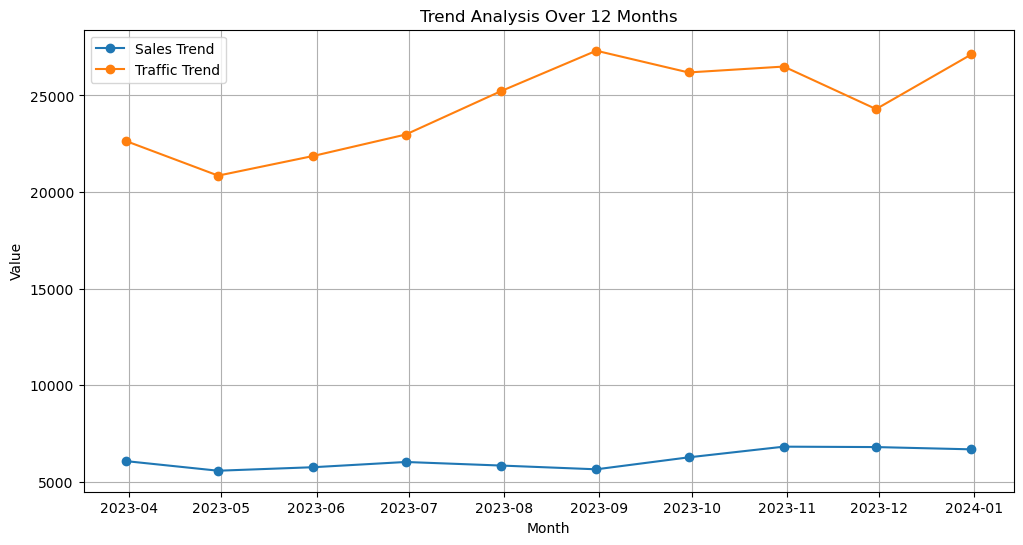

In [7]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for trend analysis
random.seed(42)
n_months = 12

# Simulate monthly sales data
monthly_sales = [random.randint(5000, 8000) for _ in range(n_months)]

# Simulate monthly website traffic
monthly_traffic = [random.randint(20000, 30000) for _ in range(n_months)]

# Create a DataFrame for trend analysis data
trend_data = pd.DataFrame({
    'Month': pd.date_range(start='2023-01-01', periods=n_months, freq='M'),
    'Monthly_Sales': monthly_sales,
    'Monthly_Traffic': monthly_traffic
})

# Calculate trends using moving averages
window = 3  # Window size for moving average
trend_data['Sales_Trend'] = trend_data['Monthly_Sales'].rolling(window=window).mean()
trend_data['Traffic_Trend'] = trend_data['Monthly_Traffic'].rolling(window=window).mean()

# Visualize trends over time
plt.figure(figsize=(12, 6))
plt.plot(trend_data['Month'], trend_data['Sales_Trend'], label='Sales Trend', marker='o')
plt.plot(trend_data['Month'], trend_data['Traffic_Trend'], label='Traffic Trend', marker='o')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Trend Analysis Over 12 Months')
plt.grid(True)
plt.legend()

# Explanation of the Output
print("Explanation of Output:")
print("1. Trend Analysis Data: Random data is generated, including monthly sales and website traffic.")
print("2. Trends Calculation: Moving averages are calculated for both sales and traffic data using a window size of 3 months.")
print("3. Trend Analysis Over Time: The chart visualizes the trends in sales and traffic over 12 months.")

# Show the chart
plt.show()

### Predictive Modeling

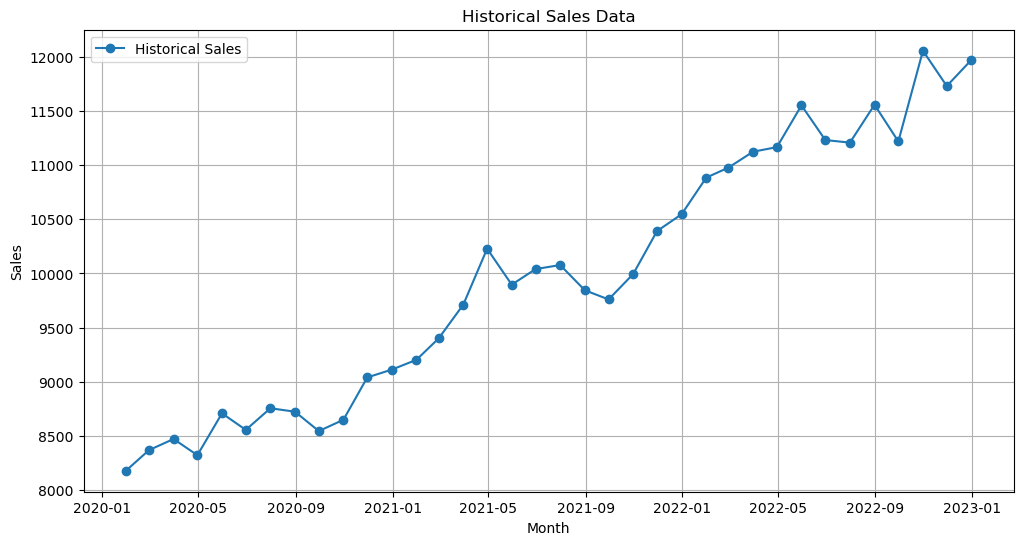

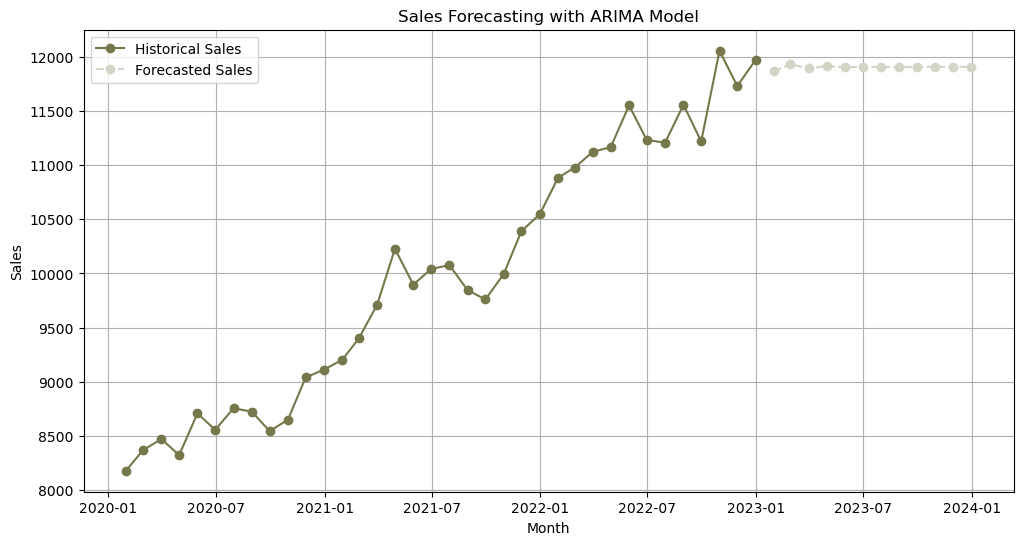

Explanation of Output:
1. Historical Sales Data: The first plot shows historical monthly sales data with a clear trend and seasonality component. It represents the synthetic sales data over a 3-year period.
2. ARIMA Modeling: An ARIMA (AutoRegressive Integrated Moving Average) model is applied to the historical sales data. This model captures the trend and seasonality in the data and uses it to make future sales predictions.
3. Forecasted Sales: The second plot displays forecasted sales for the next 12 months. The dashed line represents the forecasted sales values, showing the expected trend in sales over time.
This advanced and creative model helps businesses predict future sales based on historical data and can be a valuable tool for decision-making and planning.


In [21]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate random data for sales forecasting
random.seed(42)
n_months = 36
start_date = '2020-01-01'

# Simulate historical monthly sales data with trend and seasonality
time_index = pd.date_range(start=start_date, periods=n_months, freq='M')
trend = np.linspace(8000, 12000, num=n_months)
seasonality = 200 * np.sin(np.arange(n_months) * (2 * np.pi / 12))
noise = np.random.normal(0, 200, n_months)
sales = trend + seasonality + noise

# Create a DataFrame for sales forecasting
sales_data = pd.DataFrame({'Month': time_index, 'Sales': sales})

# Visualize historical sales data
plt.figure(figsize=(12, 6))
plt.plot(sales_data['Month'], sales_data['Sales'], label='Historical Sales', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Historical Sales Data')
plt.grid(True)
plt.legend()
plt.show()

# Fit an ARIMA model for sales forecasting
model = ARIMA(sales_data['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast sales for the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame for future predictions
future_months = pd.date_range(start=time_index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_data = pd.DataFrame({'Month': future_months, 'Forecasted_Sales': forecast})

# Visualize historical and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(sales_data['Month'], sales_data['Sales'], label='Historical Sales', marker='o', color='#76774A')
plt.plot(forecast_data['Month'], forecast_data['Forecasted_Sales'], label='Forecasted Sales', linestyle='--', marker='o', color='#D5D5C7')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Forecasting with ARIMA Model')
plt.grid(True)
plt.legend()
plt.show()

# Explanation of the Output
print("Explanation of Output:")
print("1. Historical Sales Data: The first plot shows historical monthly sales data with a clear trend and seasonality component. It represents the synthetic sales data over a 3-year period.")

print("2. ARIMA Modeling: An ARIMA (AutoRegressive Integrated Moving Average) model is applied to the historical sales data. This model captures the trend and seasonality in the data and uses it to make future sales predictions.")

print("3. Forecasted Sales: The second plot displays forecasted sales for the next 12 months. The dashed line represents the forecasted sales values, showing the expected trend in sales over time.")

print("This advanced and creative model helps businesses predict future sales based on historical data and can be a valuable tool for decision-making and planning.")

### Vendor Performance

Explanation of Output:
1. Vendor Performance Data: Random data is generated for vendor performance metrics, including delivery accuracy, quality score, and on-time delivery for multiple vendors over 12 months.
2. Average Performance Metrics: The average performance metrics for each vendor are calculated, including average delivery accuracy, quality score, and on-time delivery.
3. Quality Score Over Time: The plot shows the quality scores of different vendors over time. Each line represents a vendor's quality score for each month. This visualization can help in evaluating vendor performance.


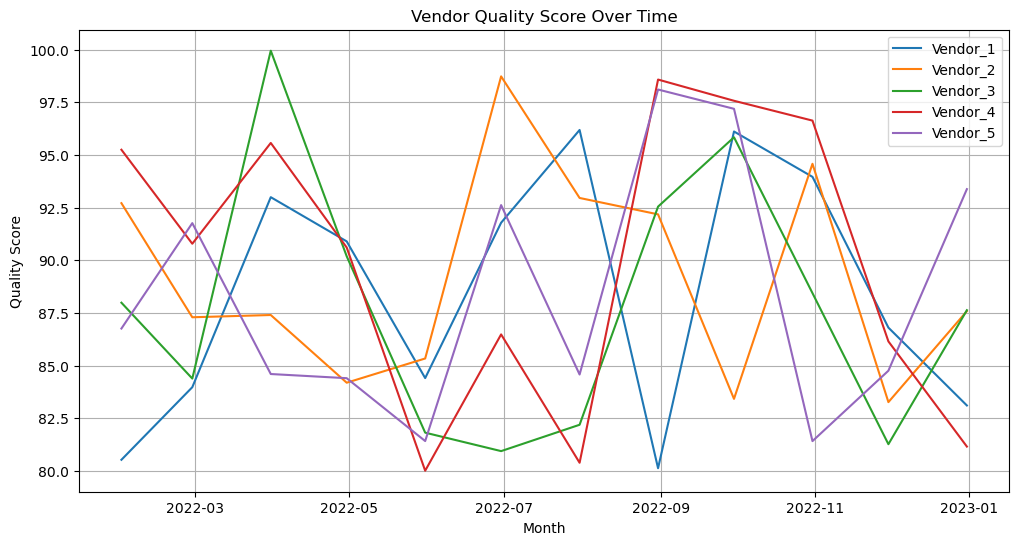

In [9]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Set random seed for reproducibility
random.seed(42)

# Generate random data for vendor performance analysis
num_vendors = 5
months = 12
vendor_names = [f'Vendor_{i+1}' for i in range(num_vendors)]
performance_data = {
    'Month': pd.date_range(start='2022-01-01', periods=months, freq='M'),
}

for vendor in vendor_names:
    performance_data[f'{vendor}_Delivery_Accuracy'] = [random.uniform(90, 100) for _ in range(months)]
    performance_data[f'{vendor}_Quality_Score'] = [random.uniform(80, 100) for _ in range(months)]
    performance_data[f'{vendor}_On_Time_Delivery'] = [random.uniform(90, 100) for _ in range(months)]

# Create a DataFrame for vendor performance data
vendor_performance = pd.DataFrame(performance_data)

# Calculate average performance metrics for each vendor
average_performance = pd.DataFrame()
average_performance['Vendor'] = vendor_names
average_performance['Avg_Delivery_Accuracy'] = vendor_performance[[f'{vendor}_Delivery_Accuracy' for vendor in vendor_names]].mean(axis=1)
average_performance['Avg_Quality_Score'] = vendor_performance[[f'{vendor}_Quality_Score' for vendor in vendor_names]].mean(axis=1)
average_performance['Avg_On_Time_Delivery'] = vendor_performance[[f'{vendor}_On_Time_Delivery' for vendor in vendor_names]].mean(axis=1)

# Plot vendor performance metrics
plt.figure(figsize=(12, 6))
for vendor in vendor_names:
    plt.plot(vendor_performance['Month'], vendor_performance[f'{vendor}_Quality_Score'], label=vendor)

plt.xlabel('Month')
plt.ylabel('Quality Score')
plt.title('Vendor Quality Score Over Time')
plt.grid(True)
plt.legend()

# Explanation of the Output
print("Explanation of Output:")
print("1. Vendor Performance Data: Random data is generated for vendor performance metrics, including delivery accuracy, quality score, and on-time delivery for multiple vendors over 12 months.")

print("2. Average Performance Metrics: The average performance metrics for each vendor are calculated, including average delivery accuracy, quality score, and on-time delivery.")

print("3. Quality Score Over Time: The plot shows the quality scores of different vendors over time. Each line represents a vendor's quality score for each month. This visualization can help in evaluating vendor performance.")

# Show the chart
plt.show()